Simple Linear Regression
According to the United Nations Environmental Program (UNEP) Sustainable Buildings and Climate Initiative, construction trade contributes as much as 30% to all global greenhouse gas emissions and consumes up to 40% of all energy used worldwide. Climate change is currently having a powerful impact on how buildings are designed and constructed.

Predicting numeric outcomes with some accuracy measure is an important facet of machine learning and data science. For this part, we will use a case study to understand linear regression and its associated cousins. We will learn about the assumptions behind linear regression, multiple linear regression, partial least squares and penalizations. We’ll also focus on strategies for measuring regression performance and implementations. 

In this module, we will develop a multivariate multiple regression model to study the effect of eight input variables on two output variables, which are the heating load and the cooling load, of residential buildings. The data provided is from the energy analysis data of 768 different building shapes. The features provided are the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution. 

Data Source for content: UCI Machine Learning Repository: Energy efficiency Data Set

Data Quiz: UCI Machine Learning Repository: Appliances energy prediction Data Set

Simple Linear Regression
The simple linear regression model.

A simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the independent variable and the other the dependent variable. The independent variable (X) is used to predict and also called the predictor while the predicted variable is referred to as the response variable (Y) (e.g. finding the relationship between the amount of CO2 gas emitted and the number of trees cut down). The value of Y can be obtained from X by finding the line of best fit (regression line) with minimum error for the data points on a scatter plot for both variables. A simple linear regression can be represented as:

y~=\theta_{0}x+\theta_{1}y =θ 
0
​	
 x+θ 
1
​	
 
where

x ~ is~the~independent~variable,x is the independent variable,
{\theta}_{1}~is ~the~interceptθ 
1
​	
  is the intercept
{\theta}_{0}~is ~the~slope~of~the~line~of~best~fitθ 
0
​	
  is the slope of the line of best fit
{\theta}_0 ~and~ {\theta}_1~are~known~as~regression ~coefficients.θ 
0
​	
  and θ 
1
​	
  are known as regression coefficients.
The UCI Machine Learning Repository: Energy efficiency Data Set is used in this module for better understanding of the concepts. We select a sample of the dataset and use the relative compactness column as the predictor and the heating load column the response variable.



Collinearity and Assumptions for Linear Regression

For better understanding, we explain the assumptions made by linear regression by comparing results on our energy efficiency dataset and a dummy linear dataset generated to have similar shape (same number of rows and column) as the energy efficiency dataset. Some assumptions made by linear regression models about the data are:

1. Linearity: the relationship between the variables is linear such that a straight line is the line of best fit.



From the regression plots above, we can see that the residuals of the dummy data are spread across the regression line as they should be to meet the linearity assumption unlike the residuals of the energy efficiency dataset which are a bit farther from the regression line.

2. Homoscedasticity: the residuals or prediction errors are of equal or constant variance.



The variance of the residuals for the dummy dataset appear to be uniform as opposed to the energy efficiency dataset which violates this assumption.

3. Normality: the residuals are of a normal distribution



The energy efficiency dataset flouts this assumption as the residuals are clearly not normally distributed while the dummy dataset has normally distributed residuals with the mean and median at 0. 

4. Independence of the observations

In multiple linear regression where there are more predictors, it is assumed that these variables are independent of each other without any strong correlation between them.



The energy efficiency dataset shows a strong correlation between relative compactness and surface area, relative compactness and overall height, surface area and roof area while the variables in the dummy dataset are seen to be independent of each other.

Overall, before inferences are drawn from a linear regression model, all the assumptions discussed above must have been met.

Residual sum of squares and minimizing the cost function

A cost function is a measure of the performance of a model i.e. how far or close the predicted values are to the real values. The objective is to minimise the cost function in order for the model to continuously learn to obtain better results. In linear regression, the cost function can be defined as the sum of squared errors in a training set. The squares of the residuals are taken to penalise errors farther from the line of best fit more than those closer to the line and obtain the best parameter values. 

Gradient descent and coordinate descent algorithm

Gradient descent is an optimization algorithm that minimizes a cost function by specifying the direction to move towards to obtain a local or global minima. This is done by initially starting with random values then iteratively updating the values until the minimum cost is obtained.  A learning rate is usually chosen to determine the step size to be taken for each iteration. It is important to carefully select this parameter because, if a small step is chosen, it will take a long time to converge to the minimum cost while if too large, it can result in an overshoot surpassing the location of the minimum cost.

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [48]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [49]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [50]:
df = df.rename(columns=column_names)

In [51]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [52]:
#select a sample of the dataset
simple_linear_reg_df = df[["Relative_Compactness", "Cooling_Load"]].sample(15, random_state=2)

In [53]:
simple_linear_reg_df

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


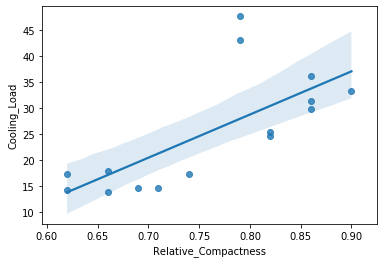

In [54]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

**Multiple Linear Regression**

Unlike simple linear regression, multiple linear regression establishes the relationship between the response variable and the predictors (usually two or more). In reality, several factors contribute to a certain outcome as opposed to just one as suggested by simple linear regression. Multiple linear regression has similar assumptions as simple linear regression and also assumes that there is no significant correlation between the predictors. While the relationship between variables can be linear, it allows for non-linear relationships that are not straight lines.

Y= 𝜃0 + 𝜃1X1 + 𝜃2X2 + . . .  +  𝜃nXn + ɛ

Collinearity 

Correlation is a measure used to describe the linear relationship between two variables. Correlation values range from -1 for a perfect negative correlation (an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together). A correlation value of 0 indicates that there is absolutely no correlation between both variables. A situation where two or more of the predictors have a strong correlation is known as multicollinearity. Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable. In addition, not all the predictors included are relevant in obtaining better results from the model. Adding more independent variables to the model is not always better instead, it might only make the model more complicated. To resolve this, one of the correlated predictors is selected and the other removed from the data.

Polynomial Regression

A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable. It can be represented as Y= 𝜃0 + 𝜃1X + 𝜃2X2 + . . .  +  𝜃nXn + ɛ, for a single independent variable where n is the degree of the polynomial and Y is a linear function of 𝜃. Depending on the task and data, there might be multiple predictors in a polynomial regression model which results in more interactions in the model. As expected, the complexity in the model increases as the degree increases.

- Coefficients of multiple linear regression

- General notations

**Measuring Regression Performance**

**Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)**

How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate metric to evaluate the performance. In this section, we discuss some examples of metrics used in evaluating regression models such as RSS, R-Squared, RMSE and MAE

**Mean Absolute Error (MAE)**

MAE  is easy and intuitive such that it calculates the sum of the  average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers



**Residual Sum of Squares (RSS)**

Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.



**Root Mean Square Error (RMSE)**

This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. It describes the spread of the residuals from the line of best fit and the noise in the model. When the RMSE is low, it means that the error made by the model has a small deviation from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observations.



**R-Squared** 

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.



**Model complexity, Underfitting and Overfitting**

Model complexity refers to the number of input features used to train a model and the algorithmic learning complexity. An overly complex model can be difficult to interpret, prone to overfitting and also require more computing. When creating models, it is imperative for the model to generalise well enough to make reasonable predictions on new and unseen data. An overfit model will perform well on the training data and poorly on unseen data. While a model is required to learn the actual relationship of the variables in the training set, an overfit model memorises the training set, fits the noise, outliers and irrelevant information, then makes predictions based on this noise which is incorrect. On the other hand, when a model is too simple, it can be as a result of having very few features not sufficient enough to learn details and relationships in the data.  In a later section, we will discuss methods that can be used to achieve optimal and acceptable model complexities while avoiding overfitting and underfitting. 

**The Bias-Variance tradeoff**

Bias and variance are common occurrences in machine learning and there is a constant struggle to achieve low bias and variance. Bias is a measure of correctness of a model i.e. how far off is a model from being correct? While high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents underfitting by capturing important relationships. On the other hand, variance tells how much the values estimated by a model will vary across different training data. When the variance is low, it means that there is only a small change in the estimate of the model with  new training  data. A high variance causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt patterns from one training data such that it cannot generalise to other training sets. While it is essential to obtain low bias and low variance, it is almost impossible to achieve this simultaneously which is where the ‘bias-variance tradeoff’ occurs. 



**1. Mean Absolute Error (MAE)**

In [55]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [56]:
normalised_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [57]:
features_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [58]:
heating_target

0      0.257212
1      0.257212
2      0.257212
3      0.257212
4      0.399838
         ...   
763    0.320032
764    0.283904
765    0.281208
766    0.282286
767    0.286600
Name: Heating_Load, Length: 768, dtype: float64

In [59]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [60]:
x_train

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
88,0.055556,0.916667,0.571429,1.000000,0.0,0.000000,0.250,0.2
467,0.194444,0.750000,0.285714,1.000000,0.0,1.000000,0.625,0.8
550,0.388889,0.500000,1.000000,0.111111,1.0,0.666667,1.000,0.2
147,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.250,0.6
481,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.625,1.0
...,...,...,...,...,...,...,...,...
645,0.388889,0.500000,1.000000,0.111111,1.0,0.333333,1.000,0.6
715,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.000,0.8
72,0.333333,0.583333,0.000000,1.000000,0.0,0.000000,0.250,0.2
235,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,0.250,0.8


In [61]:
y_train

88     0.253438
467    0.184686
550    0.935562
147    0.494473
481    0.608520
         ...   
645    0.912106
715    0.345915
72     0.117282
235    0.246697
37     0.029388
Name: Heating_Load, Length: 537, dtype: float64

In [62]:
x_test

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
285,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,0.250,1.0
101,0.777778,0.166667,0.428571,0.111111,1.0,0.333333,0.250,0.4
581,0.777778,0.166667,0.428571,0.111111,1.0,0.333333,1.000,0.4
352,0.472222,0.416667,0.571429,0.333333,1.0,0.000000,0.625,0.4
726,0.777778,0.166667,0.428571,0.111111,1.0,0.666667,1.000,1.0
...,...,...,...,...,...,...,...,...
241,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.250,1.0
599,0.388889,0.500000,1.000000,0.111111,1.0,1.000000,1.000,0.4
650,0.333333,0.583333,0.000000,1.000000,0.0,0.666667,1.000,0.6
11,0.666667,0.250000,0.285714,0.333333,1.0,1.000000,0.000,0.0


In [63]:
y_test

285    0.181451
101    0.638177
581    0.823942
352    0.877865
726    0.774063
         ...   
241    0.493934
599    0.927743
650    0.218118
11     0.331626
214    0.730116
Name: Heating_Load, Length: 231, dtype: float64

In [64]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [66]:
predicted_values

array([0.18981934, 0.57995605, 0.7434082 , 0.71728516, 0.75756836,
       0.25      , 0.1685791 , 0.60717773, 0.25024414, 0.54858398,
       0.31726074, 0.66174316, 0.69177246, 0.30395508, 0.19091797,
       0.71826172, 0.57263184, 0.31359863, 0.26257324, 0.75012207,
       0.69641113, 0.06628418, 0.60595703, 0.32800293, 0.2154541 ,
       0.74768066, 0.33898926, 0.1854248 , 0.80358887, 0.26953125,
       0.6842041 , 0.73864746, 0.14050293, 0.28588867, 0.56225586,
       0.80859375, 0.33630371, 0.13549805, 0.72290039, 0.25085449,
       0.82775879, 0.1541748 , 0.1126709 , 0.16455078, 0.11743164,
       0.15478516, 0.48852539, 0.68774414, 0.7532959 , 0.72192383,
       0.10375977, 0.66638184, 0.09716797, 0.25317383, 0.7644043 ,
       0.76879883, 0.73925781, 0.63037109, 0.1484375 , 0.29956055,
       0.19006348, 0.59558105, 0.60131836, 0.76477051, 0.57165527,
       0.92773438, 0.68249512, 0.31762695, 0.6706543 , 0.2355957 ,
       0.54760742, 0.25354004, 0.23010254, 0.72509766, 0.28613

In [79]:
predicted_values1 = linear_model.predict(x_train)
predicted_values1

array([ 0.1541748 ,  0.20019531,  0.90905762,  0.52600098,  0.61645508,
        0.17797852,  0.56628418,  0.80419922,  0.23657227,  0.73034668,
        0.72106934,  0.6920166 ,  0.73071289,  0.27124023,  0.09655762,
        0.32702637,  0.0567627 ,  0.3182373 ,  0.64904785,  0.51599121,
        0.02868652,  0.22021484,  0.18786621,  0.34887695,  0.12268066,
        0.75732422,  0.26428223,  0.74975586,  0.66601562,  0.17175293,
        0.22229004,  0.59777832,  0.79931641,  0.2623291 ,  0.18994141,
        0.59619141,  0.69238281,  0.67907715,  0.67626953,  0.69702148,
        0.69873047,  0.21569824,  0.33996582,  0.02807617,  0.57543945,
        0.68005371,  0.1385498 ,  0.52563477,  0.64440918,  0.27185059,
        0.76416016,  0.22045898,  0.75476074,  0.10339355,  0.17895508,
        0.65039062,  0.4888916 ,  0.25524902,  0.25036621,  0.25500488,
        0.11376953,  0.61669922,  0.1340332 ,  0.65698242,  0.17333984,
        0.51611328,  0.5892334 ,  0.25537109,  0.2208252 ,  0.19

**1. Mean Absolute Error (MAE)**

In [67]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

**2. R-Squared**

In [68]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

**3. Residual sum of squares (RSS)**

In [80]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.807

**4. Root Mean Square Error (RMSE)**

In [70]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

**Penalization Methods**

**Regulating over- and under-fitting**
Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model. Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.

**Ridge Regression**

Also known as L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them. The shrinkage prevents overfitting caused by the complexity of the model or  collinearity. It includes the square magnitude of the coefficients to the loss function as the penalty term.  If the error is defined as the square of residual, when a L2 regularization term is added, the  result is the equation below.


As lambda increases, the penalty increases causing more coefficients to shrink in the same vein, if lambda is zero, it results in the loss function.


**Feature Selection, The LASSO Regression and Elastic Net**

**Feature Selection and Lasso Regression**

Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly. The process of selecting significant features that contribute the most in obtaining high performing models is known as feature selection. Lasso regression (Least Absolute Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors. By using L1 regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation (Lasso regression)  results in simpler and sparse models that allow for better interpretation. Although lasso regression helps prevent overfitting, one major limitation is that it does not consider other factors when eliminating predictors. For example, it arbitrarily  eliminates a variable from a correlated pair which might not be a good rational from a human perspective. When a L1 regularization term is added, the  result is the equation below.





**Elastic Net Regression**

This is simply a combination of the L1 and L2 penalties from ridge and lasso regression. This method arose from the need to overcome the limitations of lasso regression. It regularizes and performs feature selection simultaneously by initially finding the optimal values of the coefficients as in ridge then performs a shrinkage.

In [71]:
#comparing the effects of regularisation
def get_weights_df(linear_model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [72]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [75]:
linear_model_weights

,Features,Linear_Model_Weight
0,Roof_Area,-4.520688e+12
1,Wall_Area,-3.516091e+12
2,Relative_Compactness,-6.064125e-01
3,Orientation,9.841919e-04
4,Glazing_Area_Distribution,2.335262e-02
5,Glazing_Area,2.179174e-01
6,Overall_Height,3.886719e-01
7,Surface_Area,6.027584e+12


In [76]:
ridge_weights_df

,Features,Ridge_Weight
0,Relative_Compactness,-0.283471
1,Roof_Area,-0.163192
2,Surface_Area,-0.062275
3,Orientation,0.003369
4,Glazing_Area_Distribution,0.029088
5,Wall_Area,0.103061
6,Glazing_Area,0.212449
7,Overall_Height,0.442467


In [77]:
lasso_weights_df

,Features,Lasso_weight
0,Relative_Compactness,-0.027719
1,Surface_Area,0.000000
2,Roof_Area,-0.000000
3,Orientation,0.000000
4,Glazing_Area_Distribution,0.021431
5,Wall_Area,0.200087
6,Glazing_Area,0.206132
7,Overall_Height,0.463482


In [78]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Roof_Area,-4.520688e+12,-0.163192,-0.000000
1,Wall_Area,-3.516091e+12,0.103061,0.200087
2,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
3,Orientation,9.841919e-04,0.003369,0.000000
4,Glazing_Area_Distribution,2.335262e-02,0.029088,0.021431
5,Glazing_Area,2.179174e-01,0.212449,0.206132
6,Overall_Height,3.886719e-01,0.442467,0.463482
7,Surface_Area,6.027584e+12,-0.062275,0.000000


**Non-Linear Regression Methods and Other Recommendations**

**Model Tuning and choosing parameters**

Machine learning models are parameterized such that there has to be a search for the combination of parameters that will result in the optimal performance of the model. The parameters that define the model architecture are referred to as hyperparameters while the process of exploring a range of values is called hyperparameter tuning. It is important to note the distinction between model parameters and hyperparameters. Unlike hyperparameters, model parameters are learnt during the training phase while setting hyperparameters is exclusive of the training process. Ideally, when hyperparameter tuning is completed, the result is the best parameters for the model. Grid search and random search are two common strategies for tuning hyperparameters. 

**Grid Search**

Grid search explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model with the best result selected and its corresponding parameters. While it is computationally expensive, setting up a grid search is quite easy.

**Random Search**

As opposed to grid search, random search randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.


**Data splitting, resampling and cross validation strategy**

Data splitting in data science involves setting aside a portion of the dataset for testing (out of sample or hold-out) and evaluating the performance of the model to provide unbiased results while the rest is used in fitting the model. The proportion of division is solely based on choice and sometimes, the size of the dataset. However a common practice is to split the dataset into training, validation or dev and testing sets where the validation set is used to tune the hyperparameters to select the best values for the model. Resampling involves repeatedly selecting samples from the original dataset and using these samples to obtain more information about the model. This can create different samples of the training set and another for evaluation. Cross validation is a method used to generalise and prevent overfitting in machine learning